In [3]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

%matplotlib inline

# Airbnb EDA
- Import dataset
- EDA to visualize data and observe structure


In [4]:
data = pd.read_csv('data/data.csv')



In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [9]:

np.random.seed(42)
mask = np.random.rand(data.shape[0]) <= 0.7

print('Train set shape {0}, test set shape {1}'.format(data[mask].shape, data[~mask].shape))

Train set shape (34356, 16), test set shape (14539, 16)


# Number of reviews based on price

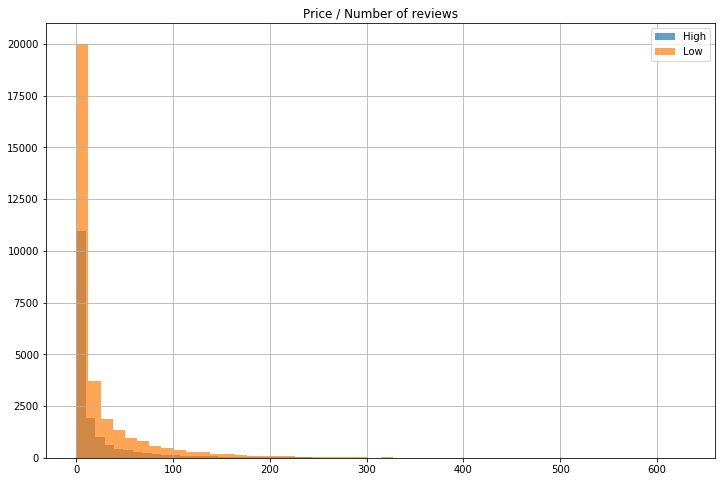

In [10]:
high_price = data[data['price'] >= 150]['number_of_reviews']
low_price = data[data['price'] < 150]['number_of_reviews']

fig = plt.figure(figsize=(12,8))
plt.title("Price / Number of reviews")
high_price.hist(alpha = 0.7, bins = 50, label = 'High')
low_price.hist(alpha = 0.7, bins = 50, label = 'Low')
plt.legend(loc = "upper right")


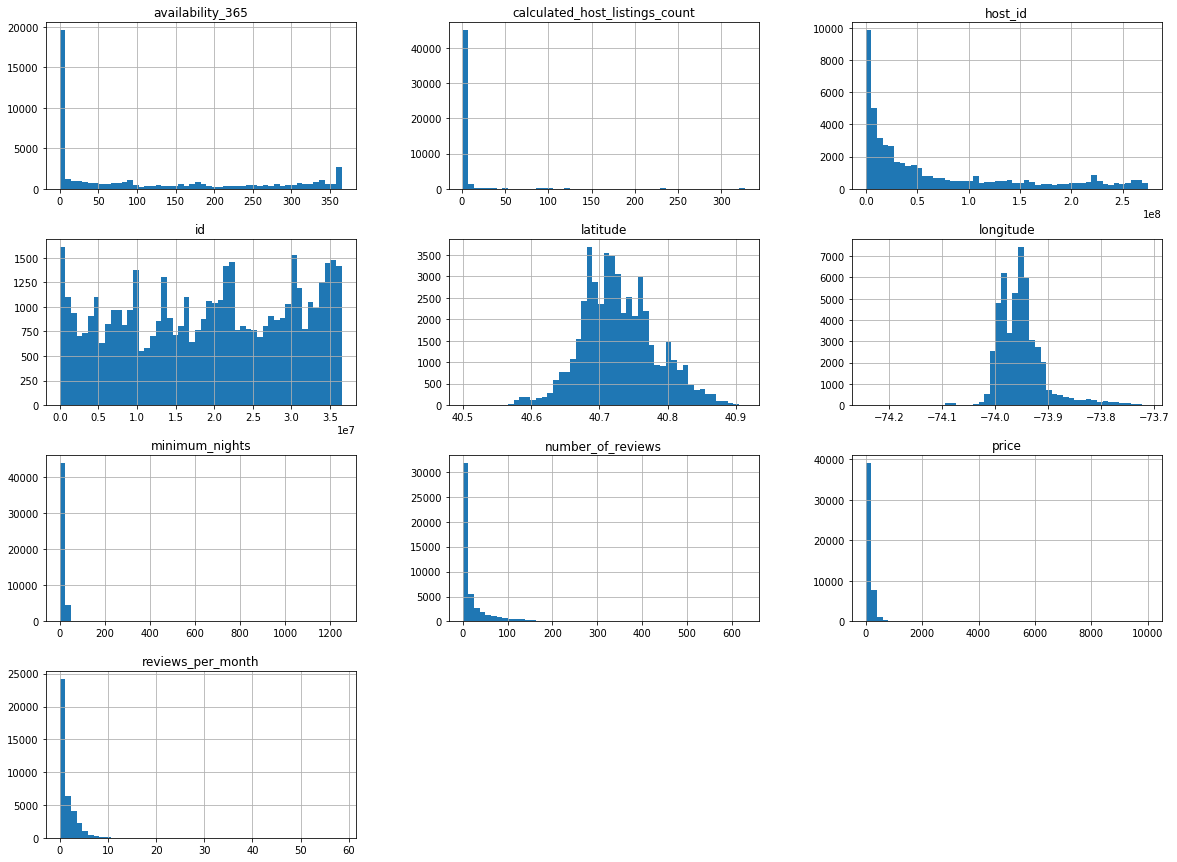

In [11]:
data.hist(bins =50, figsize =(20,15))
plt.show()

# Cleaning the data

In [12]:
drop_cols = ['last_review', 'reviews_per_month', 'host_name','name', 'latitude','longitude', 'id', 'host_id']

In [13]:
data = data.drop(drop_cols, axis =1)

In [14]:
data.shape

(48895, 8)

In [15]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: int64(5), object(3)
memory usage: 3.0+ MB


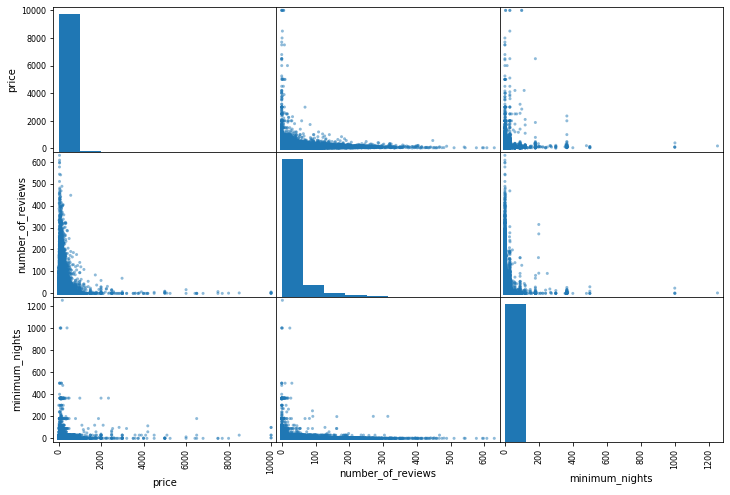

In [17]:
scatter_matrix(data[["price", "number_of_reviews", "minimum_nights"]],
              figsize = (12, 8))
plt.show()

In [18]:
data[mask]
data[~mask]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
7,Manhattan,Hell's Kitchen,Private room,79,2,430,1,220
9,Manhattan,Chinatown,Entire home/apt,150,1,160,4,188
11,Manhattan,Hell's Kitchen,Private room,85,2,188,1,39
...,...,...,...,...,...,...,...,...
48874,Manhattan,East Harlem,Private room,50,7,0,1,22
48876,Manhattan,Harlem,Private room,60,1,0,1,26
48882,Brooklyn,Bushwick,Private room,40,20,0,1,31
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9


# Linear regression with disorganised data

In [19]:
lr = LinearRegression()
lr.fit(data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1),
       data[mask]['price'])
pred = lr.predict(data[~mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - data[~mask]['price'])**2))))

RMSE = 233.88


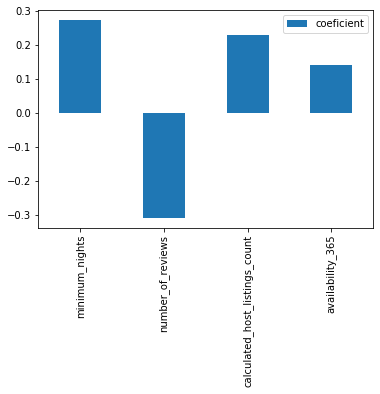

In [20]:
pd.DataFrame(lr.coef_, columns=['coeficient'],
    index=data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1).columns,
             ).plot(kind='bar')

# One Hot Encoder 

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat = data[["neighbourhood_group"]]
data_cat_1hot = cat_encoder.fit_transform(data_cat)

In [22]:
data_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [23]:
data = pd.concat([data, pd.DataFrame(data_cat_1hot.toarray(),
                                    columns=cat_encoder.categories_)], axis =1)

In [24]:
cat_encoder = OneHotEncoder()
data_cat1 = data[["room_type"]]
data_cat_2hot = cat_encoder.fit_transform(data_cat1)

In [25]:
data_cat_2hot.toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [26]:
data = pd.concat([data, pd.DataFrame(data_cat_2hot.toarray(),
                                    columns=cat_encoder.categories_)], axis =1)

In [27]:
data.neighbourhood 

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

In [28]:
values = ["Flatiron District", "Lower East Side", "Soho", "Little Italy", "Tribeca", "Upper East Side", "Financial District", "Hell's Kitchen"]

In [29]:
data["Popular_Manhattan"] = data.neighbourhood.isin(values)

In [30]:
data['Popular_Manhattan'] *= 1

In [32]:
data

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,"(Bronx,)","(Brooklyn,)","(Manhattan,)","(Queens,)","(Staten Island,)","(Entire home/apt,)","(Private room,)","(Shared room,)",Popular_Manhattan
0,Brooklyn,Kensington,Private room,149,1,9,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,Manhattan,Harlem,Private room,150,3,0,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
48891,Brooklyn,Bushwick,Private room,40,4,0,2,36,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
48892,Manhattan,Harlem,Entire home/apt,115,10,0,1,27,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [33]:
drop_cols1 = ['neighbourhood', 'neighbourhood_group','room_type'] 

In [34]:
data = data.drop(drop_cols1, axis =1)

# Standardising the data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
standard = StandardScaler().fit(data)
data_scaled = standard.transform(data)

In [37]:
print(data_scaled.mean(axis = 0))

[ 3.72019512e-17  1.10443293e-17  1.86009756e-17 -1.86009756e-17
  0.00000000e+00  4.65024390e-18  1.25556585e-16 -3.48768292e-18
 -6.74285365e-17 -1.33694512e-17 -9.47487194e-17 -1.16256097e-18
  1.86009756e-17  9.76551219e-17]


In [38]:
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

In [39]:
data_scaled.loc[data_scaled['Popular_Manhattan'] == 1]

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,"(Bronx,)","(Brooklyn,)","(Manhattan,)","(Queens,)","(Staten Island,)","(Entire home/apt,)","(Private room,)","(Shared room,)",Popular_Manhattan


In [40]:
data_scaled

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,"(Bronx,)","(Brooklyn,)","(Manhattan,)","(Queens,)","(Staten Island,)","(Entire home/apt,)","(Private room,)","(Shared room,)",Popular_Manhattan
0,-0.015493,-0.293996,-0.320414,-0.034716,1.916250,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-1.040134,1.090893,-0.155887,-0.366465
1,0.300974,-0.293996,0.487665,-0.156104,1.840275,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887,-0.366465
2,-0.011329,-0.196484,-0.522433,-0.186451,1.916250,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-1.040134,1.090893,-0.155887,-0.366465
3,-0.265335,-0.293996,5.538156,-0.186451,0.617065,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,0.961415,-0.916680,-0.155887,-0.366465
4,-0.302811,0.144807,-0.320414,-0.186451,-0.856865,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887,-0.366465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.344452,-0.245240,-0.522433,-0.156104,-0.788486,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-1.040134,1.090893,-0.155887,-0.366465
48891,-0.469373,-0.147729,-0.522433,-0.156104,-0.583352,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-1.040134,1.090893,-0.155887,-0.366465
48892,-0.157070,0.144807,-0.522433,-0.186451,-0.651730,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887,-0.366465
48893,-0.406912,-0.293996,-0.522433,-0.034716,-0.841669,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-1.040134,-0.916680,6.414894,2.728771


# Linear Regression with clean and standardised data

In [41]:
lr = LinearRegression()
lr.fit(data_scaled[mask].drop(['price'] , axis = 1),
       data_scaled[mask]['price'])
pred = lr.predict(data_scaled[~mask].drop(['price'], axis = 1))
print('RMSE = {0:.02f}'.format(
np.sqrt(np.mean((pred - data_scaled[~mask]['price'])**2))))

RMSE = 0.93


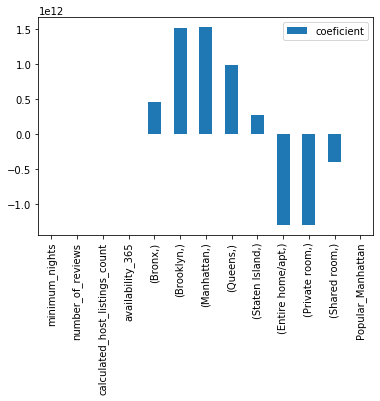

In [42]:
pd.DataFrame(lr.coef_, columns = ['coeficient'],
            index = data_scaled[mask].drop(['price'], axis = 1).columns,
            ).plot(kind='bar')

# Random Forest with disorganised data

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(data[mask].drop(['price'], axis=1),
       data[mask]['price'])
pred = rf.predict(data[~mask].drop(['price'], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - data[~mask]['price'])**2))))

RMSE = 216.62


In [44]:
rf.feature_importances_

array([0.2466244 , 0.12186782, 0.13169503, 0.29712049, 0.00072576,
       0.00874363, 0.02838345, 0.03213509, 0.00048307, 0.09049232,
       0.00130713, 0.00163101, 0.0387908 ])

# Random Forest with clean and standardised data

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_scaled[mask].drop(['price'], axis=1),
       data_scaled[mask]['price'])
pred = rf.predict(data_scaled[~mask].drop(['price'], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - data_scaled[~mask]['price'])**2))))

RMSE = 0.90


In [46]:
importances = list(zip(rf.feature_importances_, data_scaled.columns))
print (importances)

[(0.23932015126260586, 'price'), (0.13173575615943806, 'minimum_nights'), (0.13026292170613094, 'number_of_reviews'), (0.29478424179075813, 'calculated_host_listings_count'), (0.00088503391072543, 'availability_365'), (0.008326969336488924, ('Bronx',)), (0.027765594545246037, ('Brooklyn',)), (0.031771766349129524, ('Manhattan',)), (0.00041266608279421827, ('Queens',)), (0.09026626917908867, ('Staten Island',)), (0.002349777556202846, ('Entire home/apt',)), (0.0018659041390760899, ('Private room',)), (0.04025294798231537, ('Shared room',))]


In [47]:
corr_matrix = data_scaled.corr()
corr_matrix['price'].sort_values(ascending = False)

price                             1.000000
(Entire home/apt,)                0.255857
(Manhattan,)                      0.163976
Popular_Manhattan                 0.088353
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
(Staten Island,)                 -0.013840
(Bronx,)                         -0.041030
number_of_reviews                -0.047954
(Shared room,)                   -0.053613
(Queens,)                        -0.080205
(Brooklyn,)                      -0.098603
(Private room,)                  -0.240246
Name: price, dtype: float64